In [ ]:
!python.exe -m pip install --upgrade pip

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install altair
!pip install altair_viewer
!pip install plotly
!pip install dash

# Q(a)Import necessary libraries and load the dataset

In [ ]:
# Qa(i)
# Import necessary library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import altair_viewer as altair_viewer
import dash
from dash import dcc, html
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Qa(ii)
# Load the data from Departments.csv to df1
# Load the data from Tools.csv to df2
df1 = pd.read_csv('Departments.csv')
df2 = pd.read_csv('Tools.csv')

In [ ]:
# Qa(iii)
# Display the first row of each data frame (df1 and df2) to verify that data from both files has been loaded successfully.
df1.head(1)

In [ ]:
df2.head(1)

# Q(b) Merging the two data frames and filling the missing values

In [ ]:
# Qb(i)
# Run an appropriate command to merge df1 and df2 such that all rows of df2 must be selected in the merged data frame.
merged_df = pd.merge(df1, df2, on='Abb', how='right')

In [ ]:
# Qb(ii)
# Run an appropriate command to display the total number of missing values in each field.
merged_df.isnull().sum()

In [ ]:
# Qb(iii) 
# Run an appropriate command to create a mapping between Department and Abb.
dept_mapping = dict(zip(df1['Department'], df1['Abb']))
print(dept_mapping)

In [ ]:
merged_df.replace(r'^\s*$', np.nan, regex=True, inplace=True) #This is a Regular Expression Statement which removes all cells containing only whitespace
merged_df['Department'] = merged_df['Department'].fillna(merged_df['Abb'].map(dept_mapping))

In [ ]:
# Qb(iv)
# Run an appropriate command to fill the missing values of Department. Run an appropriate command to confirm that there are no missing values in any field.
merged_df.fillna("Unknown", inplace=True)
merged_df.isnull().sum()

In [ ]:
# Qb(v)
# Run an appropriate command to save the updated data frame as a CSV file.
try:
    merged_df.to_csv('CRN104389.csv', index=False)
    print('\nUpdated data frame with filled values saved to the folder as per your request')
except Exception as e:
    print(f"Error saving data frame, please close the file as unsaved if you have currently opened this file: {e}")

# Q(c) Remove duplicate values


In [ ]:
# Qc(i)
# Using the ‘Abb’ and ‘Tool’ fields, run an appropriate command to remove duplicate values from the merged data frame. 
df_no_duplicates = merged_df.drop_duplicates(subset=['Abb', 'Tool'], keep='first')

In [ ]:
# Qc(ii)
# Run an appropriate command to print the shape of original merged data frame and the shape of merged data frame after removing the duplicates.
print(f"\nShape of original merged data frame: {merged_df.shape}")
print(f"Shape of merged data frame after removing duplicates: {df_no_duplicates.shape}")

In [ ]:
# Qc(iii)
# Save the updated data frame (after removing the duplicates) as a CSV file. Rename this file to your CRN (CRN-Unique.CSV) and upload it with your answer files.
unique_filename = 'CRN104389_UpdatedDF.csv' # Replace with actual CRN
try:
    df_no_duplicates.to_csv(unique_filename, index=False)
    print(f"De-duplicated data frame saved to '{unique_filename}'")
except Exception as e:
    print(f"Error saving de-duplicated data: {e}")

# Q(d) Data Analysis

In [ ]:
# Qd(i)
# Consider the data frame obtained after removing the duplicates.
# Run an appropriate command to find the department that has the highest variety of ‘Analysis’ types.
try:
    dept_analysis_unique_count = df_no_duplicates.groupby('Department')['Analysis'].nunique()
    # Find the department(s) with the maximum count
    dept_with_max_analysis_types = dept_analysis_unique_count.idxmax()
    max_count = dept_analysis_unique_count.max()
    print(f"\nDepartment with the highest variety of Analysis types ({max_count} types): {dept_with_max_analysis_types}")
except KeyError:
    print("\nCould not perform analysis: 'Department' or 'Analysis' column not found.")
except ValueError:
     print("\nCould perform analysis: No data available after removing duplicates.")

In [ ]:
# Qd(ii)
# Consider the data frame obtained after removing the duplicates.
# Run an appropriate command to show the percentage of updating of each tool.
update_percentage = df_no_duplicates.groupby('Tool')['Updated'].apply(
    lambda x: (x=='Yes').mean() * 100
).reset_index(name='Update Percentage')
print("\nPercentage of updating for each tool:")
print(update_percentage)

# Q(e) Data Visualization

In [ ]:
# Qe(i)
# Consider the data frame obtained after removing the duplicates.
# Create a bar chart showing the count of tools per department.

dept_counts = df_no_duplicates['Department'].value_counts().reset_index()
dept_counts.columns = ['Department', 'Count']
number_of_departments = df_no_duplicates['Department'].nunique() # Determine the number of unique departments for the palette

In [ ]:
#Using Seaborn library
custom_palette = sns.color_palette("Spectral", number_of_departments) # Create a custom palette which goes through the full color spectrum
plt.figure(figsize=(15, 5))
sns.countplot(x='Department', data=df_no_duplicates, palette=custom_palette)
plt.title('Count of Tools per Department')
plt.xlabel('Department')
plt.ylabel('Number of Tools')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjusts the plot to fit the labels
plt.show()

In [ ]:
#Using plotly express library
fig_dept = px.bar(dept_counts,
                  x='Count',
                  y='Department',
                  orientation='h', # Horizontal bar chart
                  title='Number of Unique Tools per Department',
                  labels={'Count': 'Number of Tools', 'Department': 'Department'},
                  template='plotly_white', # Use a clean template
                  color='Count', # Color bars by count
                  color_continuous_scale=px.colors.sequential.Viridis) # Color scale

# Improve layout and sort bars
fig_dept.update_layout(yaxis={'categoryorder':'total ascending'}) # Sort departments by count
fig_dept.show() # Display the interactive chart

In [ ]:
#Using Altair library
department_counts = df_no_duplicates.groupby('Department').size().reset_index(name='Count') #Aggregate tool counts per department.

# Create an Altair bar chart.
chart = alt.Chart(department_counts).mark_bar().encode(
    x=alt.X('Department:N', title='Department', sort=None),
    y=alt.Y('Count:Q', title='Number of Tools'),
    color=alt.Color('Department:N', scale=alt.Scale(scheme='rainbow'))
).properties(
    title='Count of Tools per Department',
    width=600,
    height=400
)

chart

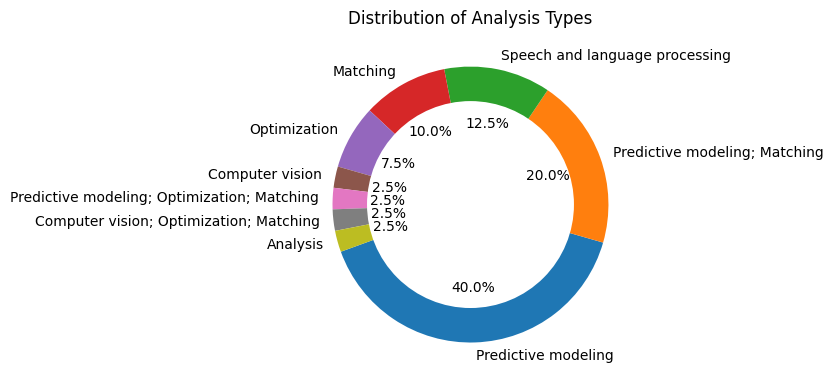

In [28]:
# Qe(ii)
# Consider the data frame obtained after removing the duplicates.
# Generate a pie chart for Analysis column.
analysis_counts = df_no_duplicates['Analysis'].value_counts()

#Using matplotlib library
plt.figure(figsize=(8, 8))
plt.pie(analysis_counts, labels=analysis_counts.index, autopct='%1.1f%%', startangle=200)
centre_circle = plt.Circle((0, 0), 0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Analysis Types')
plt.tight_layout()
plt.show()

In [ ]:
#Using plotly express library
# Example: Aggregating data for 'Analysis' field from the deduplicated DataFrame
analysis_distribution = df_no_duplicates['Analysis'].value_counts().reset_index()
analysis_distribution.columns = ['Analysis', 'Count']

# Create a doughnut chart using Plotly Express
fig = px.pie(analysis_distribution,
             values='Count',
             names='Analysis',
             title='Doughnut Chart for Analysis Distribution',
             hole=0.4,  # Creates a "hole" in the center, making it a doughnut chart
             color_discrete_sequence=px.colors.qualitative.Plotly)  # Optional: use a built-in color sequence

# Optionally update layout settings for improved aesthetics
fig.update_layout(
    legend_title_text='Analysis Type',
    margin=dict(t=50, b=0, l=0, r=0)
)

fig.show()

In [ ]:
# Qe(iii)
# Consider the data frame obtained after removing the duplicates.
# Create a bar plot to show the number of tools that are marked as "Updated". 

#using seaborn library
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Updated', data=df_no_duplicates, palette='viridis')
plt.title('Number of Tools Updated', fontsize=16)
plt.xlabel('Updated Status', fontsize=14)
plt.ylabel('Number of Tools', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#using plotly and dash libraries

df_updated_counts = df_no_duplicates['Updated'].value_counts().reset_index()
df_updated_counts.columns = ['Updated', 'Count']

# Create an interactive bar chart using Plotly Express.
fig = px.bar(
    df_updated_counts,
    x='Updated',
    y='Count',
    title='Number of Tools Updated',
    labels={'Count': 'Number of Tools', 'Updated': 'Updated Status'},
    color='Updated',  # Differentiates categories by color
    color_discrete_sequence=px.colors.qualitative.Plotly  # Use a predefined clean color sequence
)
# Refine the layout for a neat appearance.
fig.update_layout(
    xaxis_title='Updated Status',
    yaxis_title='Number of Tools',
    template='plotly_white'
)

# Build the Dash app.
app = dash.Dash(__name__)

# Define the layout of the app.
app.layout = html.Div([
    html.H1("Dashboard: Tools Updated Overview", style={'textAlign': 'center'}),
    dcc.Graph(figure=fig)
])

# Run the server.
if __name__ == '__main__':
    app.run(debug=True)